# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

Use the recent know datetime in the dataset to estimate the age of customers

You have two days to do this study

In [1]:
import pandas as pd
import numpy as np

In [2]:
campaign_df = pd.read_csv('marketing_campaign.csv', sep="\t")
campaign_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
campaign_df.shape

(2240, 29)

# EDA

In [4]:
def info(df):
    print(df.info())
    print('------------')
    print(df.describe())
    print('------------')
    print(df.nunique())
    print('------------------------------------------------')
    for i in df:
        uni =df[i].unique()
        print(i)
        print(uni)
        print('-----------------')

In [5]:
info(campaign_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
campaign_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
campaign_df[campaign_df.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [8]:
campaign_df.duplicated().sum()

0

In [9]:
df = campaign_df.drop(['Z_CostContact','Z_Revenue','ID'], axis=1)

In [10]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [11]:
from datetime import datetime
from datetime import date

In [12]:
currentYear = datetime.now().year

In [13]:
df['Age'] = currentYear - df['Year_Birth']

In [14]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,66
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,69
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,58
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,39
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,0,56
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,5,7,0,0,0,1,0,0,0,77
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,0,42
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,0,67


In [15]:
out_age = df.where(df['Age'] > 100)

In [16]:
out_age.dropna()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,1900.0,2n Cycle,Divorced,36640.0,1.0,0.0,26-09-2013,99.0,15.0,6.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,123.0
239,1893.0,2n Cycle,Single,60182.0,0.0,1.0,17-05-2014,23.0,8.0,0.0,...,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0
339,1899.0,PhD,Together,83532.0,0.0,0.0,26-09-2013,36.0,755.0,144.0,...,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,124.0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df[list(df.iloc[:, 20:].columns)] = df[list(df.iloc[:, 20:].columns)].astype("object")
df[["Kidhome","Teenhome"]] =  df[["Kidhome","Teenhome"]].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   object 
 5   Teenhome             2240 non-null   object 
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

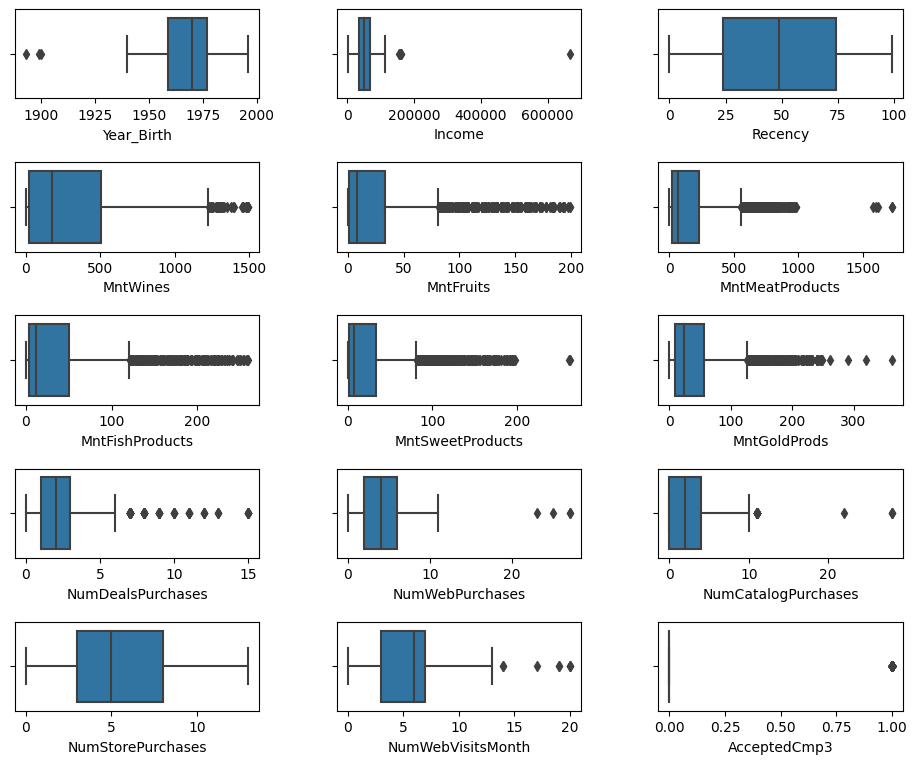

In [19]:
fig, axs = plt.subplots(5, 3, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(x=df.select_dtypes(include=['number'])[col], ax=axs[i])

In [20]:
df["Marital_Status"] = df.Marital_Status.replace(['Alone',"YOLO","Absurd"],'Single', regex=True)

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df['Income'] = imputer.fit_transform(df[['Income']])

In [22]:
df['M'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [23]:
df1 = df[['Education','Marital_Status','Kidhome','Teenhome','Dt_Customer','Recency','AcceptedCmp3',
          'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response','Age','M',
          'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Income'
         ]]

# Customer Segmentation

In [24]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [25]:
scale = ['Income','Recency','Age','M','NumDealsPurchases','Income',
         'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

In [26]:
encode = ['Education','Marital_Status','Kidhome','Teenhome']

In [27]:
robust_scaler = RobustScaler()
df1[scale] = robust_scaler.fit_transform(df1[scale])

/tmp/ipykernel_4334/3416737115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[scale] = robust_scaler.fit_transform(df1[scale])


In [28]:
df1 = pd.get_dummies(df1, columns=encode)

/home/marzime/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [31]:
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

/tmp/ipykernel_4334/2430538507.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
/tmp/ipykernel_4334/2430538507.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
/tmp/ipykernel_4334/2430538507.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
/tmp/ipykernel_4334/2430538507.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
/tmp/ipykernel_4334/2430538507.py:1: UserWarning: Parsing '15-11-2013' in DD/MM/YYYY for

In [32]:
df_true=df1[df1['Dt_Customer'].dt.year != 2014]
df_true = df_true.drop(['Dt_Customer'],axis=1)

In [33]:
df_pred=df1[df1['Dt_Customer'].dt.year == 2014]
df_pred["Dt_Customer"] = df_pred["Dt_Customer"].dt.month
df_pred = df_pred.where(df_pred['Dt_Customer'] == 1)
df_pred = df_pred.dropna()
df_pred = df_pred.drop(['Dt_Customer'],axis=1)

/tmp/ipykernel_4334/3817267904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["Dt_Customer"] = df_pred["Dt_Customer"].dt.month


In [34]:
df_pred

,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,M,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2
4,0.90,0.0,0,0,0,0,0,0,-0.611111,0.052018,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
48,0.94,0.0,0,0,0,0,0,0,1.055556,-0.276616,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
89,0.60,0.0,0,0,0,0,0,0,0.166667,-0.210501,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
116,-0.48,0.0,0,1,1,0,0,0,0.000000,1.420029,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
164,0.98,0.0,0,0,0,0,0,0,-0.166667,1.161400,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,0.58,0.0,0,0,0,0,0,0,0.277778,-0.103549,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2172,-0.16,0.0,0,0,0,0,0,0,-0.277778,0.632474,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2212,-0.50,0.0,0,0,0,0,0,0,1.111111,-0.357316,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2237,0.84,0.0,1,0,0,0,0,0,-0.611111,0.834711,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [40]:
# silhouette_scores = []
# for k in range(2, 10):
#     km = KMeans(n_clusters=k, 
#                 max_iter=300, 
#                 tol=1e-04, 
#                 init='k-means++', 
#                 n_init=10, 
#                 random_state=0, 
#                 algorithm='lloyd')
#     km.fit(df_true)
#     silhouette_scores.append(silhouette_score(df_true, km.labels_))

# fig, ax = plt.subplots()
# ax.plot(range(2, 10), silhouette_scores, 'bx-')
# ax.set_title('Silhouette Score Method')
# ax.set_xlabel('Number of clusters')
# ax.set_ylabel('Silhouette Scores')
# plt.xticks(range(2, 10))
# plt.tight_layout()
# plt.show()

In [41]:
def knn(data):
    df = data.sample(79,random_state=1)
    kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)
    labels = kmeans.labels_
    return labels

In [42]:
bla = knn(df_true)
bli = knn(df_pred)

In [43]:
ari_kmeans = adjusted_rand_score(bla, bli)
round(ari_kmeans, 2)

-0.02

# Conlusions